<a href="https://colab.research.google.com/github/ivanhazda/goit-algo-hw-03/blob/main/%D0%97%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_1_%D0%9A%D0%B5%D1%80%D0%B0%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import keras
import os

<ipython-input-19-d2d5569fc142>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
# 1. Завантажити датасет Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Імена класів
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']



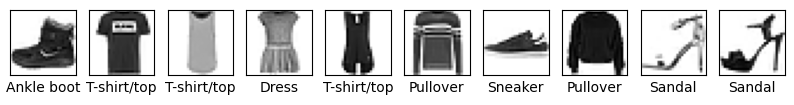

In [ ]:
# 2. Роздрукувати 10 зображень
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [ ]:
# 3. Підготовка даних (нормалізація)
x_train = (x_train / 255).astype("float32")
y_train = (y_train / 255).astype("float32")


In [ ]:
# 4. Побудова архітектури моделі
model = models.Sequential([
    keras.Input(shape=(28, 28)),
    layers.Flatten(),  # Розгортання зображень у вектор
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')  # Вихідний шар для 10 класів
])

In [ ]:
# 4. Побудова архітектури моделі
#    keras.Input(shape=(28, 28)),
#    layers.Flatten(),  # Розгортання зображень у вектор
#    layers.Dense(512, activation='relu'),
#    layers.Dense(256, activation='relu'),
#    layers.Dense(128, activation='relu'),
#    layers.Dense(10, activation='softmax')  # Вихідний шар для 10 класів
#])


#model = tf.keras.Sequential()

#model.add(tf.keras.Input(shape=(28, 28)))
#model.add(layers.Flatten())
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Компіляція моделі
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Виведення архітектури моделі
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5. Використання ранньої зупинки та зменшення швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)

# 6. Навчання моделі
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7545 - loss: 0.6896 - val_accuracy: 0.8488 - val_loss: 0.4210 - learning_rate: 0.0010
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8482 - loss: 0.4174 - val_accuracy: 0.8503 - val_loss: 0.4012 - learning_rate: 0.0010
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8647 - loss: 0.3719 - val_accuracy: 0.8671 - val_loss: 0.3682 - learning_rate: 0.0010
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8711 - loss: 0.3504 - val_accuracy: 0.8699 - val_loss: 0.3502 - learning_rate: 0.0010
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8751 - loss: 0.3363 - val_accuracy: 0.8694 - val_loss: 0.3548 - learning_rate: 0.0010
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8794 - loss: 0.3253 - val_accuracy: 0.8731 - val_loss: 0.3505 - learning_rate: 0.0010
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.896

In [ ]:
# 7. Збереження моделі на Google Диск
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/fashion_mnist_model.keras')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


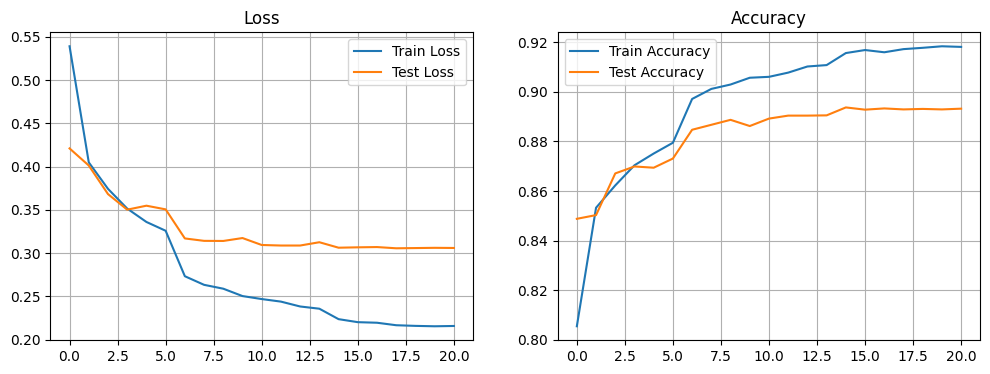

In [ ]:
# 8. Побудова графіків функції втрат і точності
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy')
plt.grid(True)
plt.legend()

plt.show()



In [ ]:
# 9. Виведення класифікаційного звіту
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
predictions = model.predict(test_images)

# Перетворюємо прогнози в мітки
predicted_labels = np.argmax(predictions, axis=1)

# Виведення класифікаційного звіту
print(classification_report(test_labels, predicted_labels, target_names=class_names))


313/313 - 0s - 1ms/step - accuracy: 0.8929 - loss: 0.3056
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.81      0.81      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.81      0.83      0.82      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.73      0.69      0.71      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



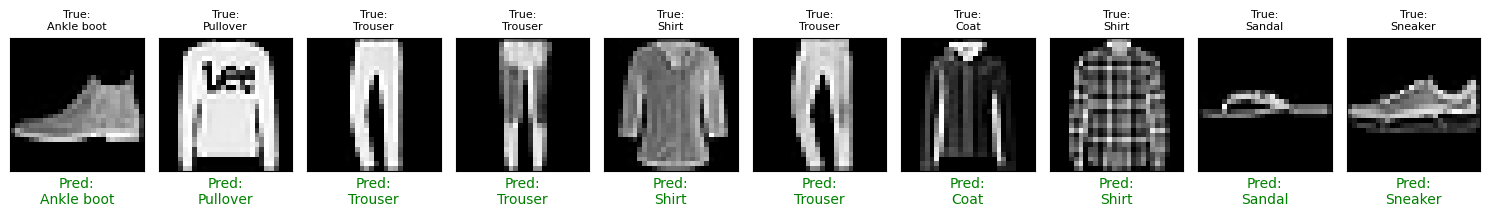

In [ ]:
plt.figure(figsize=(15, 3))  # ширше полотно для зручності

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap='gray')  # замість plt.cm.binary для кращої сумісності
    pred_label = class_names[predicted_labels[i]]
    true_label = class_names[test_labels[i]]
    color = 'green' if predicted_labels[i] == test_labels[i] else 'red'
    plt.xlabel(f"Pred:\n{pred_label}", color=color)
    plt.title(f"True:\n{true_label}", fontsize=8)

plt.tight_layout()
plt.show()

Увага, точність має бути не менше 0.87

Завдання 2. Керас тюнер

In [ ]:
!pip install keras-tuner -q

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from keras_tuner.tuners import RandomSearch

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow import keras
import os

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.Input(shape=(28, 28)))
    model.add(Flatten())

    # Додавання шарів, які будуть тюнуватися
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i),
                                     min_value=32,
                                     max_value=512,
                                     step=32),
                        activation='relu',
                        kernel_regularizer=l2(0.001)))
        model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=keras.optimizers.Adam(
                      hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='tuner_logs',
    project_name='fashion_mnist_classification'
)

Reloading Tuner from tuner_logs/fashion_mnist_classification/tuner0.json


In [ ]:
# Визначення колбеків: рання зупинка та зниження швидкості навчання
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Пошук найкращої моделі за допомогою keras_tuner
tuner.search(x_train, y_train, epochs=50, validation_data=(x_test, y_test),
             callbacks=[early_stopping, reduce_lr])

# Отримання найкращої моделі
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

# Повторне тренування найкращої моделі
history = best_model.fit(
    x_train, y_train,
    epochs=50,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 352)            │        45,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 352)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 192)            │        67,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215,594 (842.16 KB)

 Trainable params: 215,594 (842.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5877 - loss: 1.6748 - val_accuracy: 0.8150 - val_loss: 0.9687 - learning_rate: 1.0000e-04
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8121 - loss: 0.9676 - val_accuracy: 0.8411 - val_loss: 0.8246 - learning_rate: 1.0000e-04
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8355 - loss: 0.8205 - val_accuracy: 0.8459 - val_loss: 0.7434 - learning_rate: 1.0000e-04
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8514 - loss: 0.7260 - val_accuracy: 0.8528 - val_loss: 0.6781 - learning_rate: 1.0000e-04
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8566 - loss: 0.6614 - val_accuracy: 0.8569 - val_loss: 0.6266 - learning_rate: 1.0000e-04
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8626 - loss: 0.6101 - val_accuracy: 0.8633 - val_loss: 0.5877 - learning_rate: 1.0000e-04
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/st

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8874 - loss: 0.4078
Test accuracy: 0.8881000280380249
Test loss: 0.406637042760849


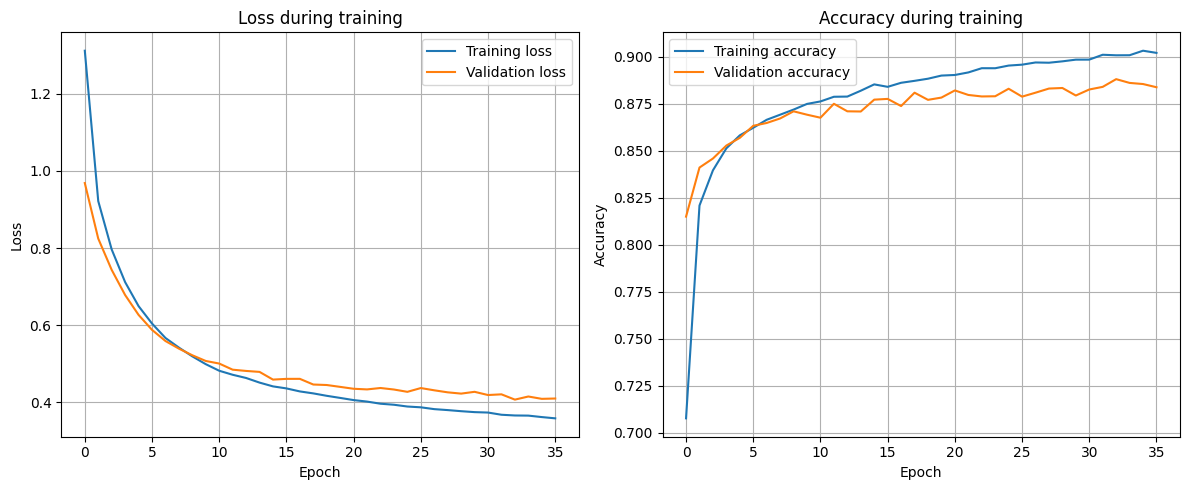

In [ ]:
# Оцінка моделі
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

# Побудова графіків функції втрат і точності
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Графік втрат
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Графік точності
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#ВИСНОВКИ (порівняння моделей)